When you run pywt.dwt2, it performs the following filtering operations:

LL (Approximation): Low-pass on rows, Low-pass on columns. This is a blurred, half-resolution version of the original image.

LH (Horizontal Detail): Low-pass on rows, High-pass on columns. This highlights horizontal edges.

HL (Vertical Detail): High-pass on rows, Low-pass on columns. This highlights vertical edges.

HH (Diagonal Detail): High-pass on rows, High-pass on columns. This highlights diagonal features and noise.


Example: take $$X = \begin{bmatrix} a & b \\ c & d \end{bmatrix}$$

We will use the Haar wavelet, also for each 1D pass the result is multiplied by a factor $1/\sqrt2$.

$$(H_{row} + L_{row}) X = \frac{1}{\sqrt 2}\begin{bmatrix} L_1 & H_1 \\ L_2 & H_2 \end{bmatrix} =\frac{1}{\sqrt 2}\begin{bmatrix} a+b & a-b \\ c+d & c-d \end{bmatrix}$$

$$LL = \frac{1}{\sqrt 2} (L_1 + L_2) = 0.5 * (a+b+c+d)$$

$$HL = \frac{1}{\sqrt 2}(H_1 + H_2) =  0.5 * (a-b+c-d)$$

$$LH = \frac{1}{\sqrt 2} (L_1 - L_2)= 0.5 * (a+b-c-d)$$

$$HH = \frac{1}{\sqrt 2} (H_1 - H_2) = 0.5 * (a-b-c+d)$$


If it is done on multiple levels it is run on recursive on LL
Imagine:
$$X = \begin{bmatrix} a & b & a & b \\ c & d & c & d \\ a & b & a & b \\ c & d & c & d \end{bmatrix}$$

It is decomposed into a "new" imagine

$$LL_1 = \begin{bmatrix} 0.5 * (a+b+c+d) & 0.5 * (a+b+c+d) \\ 0.5 * (a+b+c+d) & 0.5 * (a+b+c+d) \end{bmatrix}$$

The same logic as before now applies again and you can proceed with multiple levels.

In [1]:
import numpy as np
import pywt

data = np.array([
    [10, 20],
    [30, 40]
], dtype=float)

cA, (cH, cV, cD) = pywt.dwt2(data, 'haar')

print("Original Matrix:\n", data)
print(f"\nLL (Approximation): {cA[0,0]}  ")
print(f"LH (Horizontal):    {cH[0,0]} ")
print(f"HL (Vertical):      {cV[0,0]}  ")
print(f"HH (Diagonal):      {cD[0,0]} ")

Original Matrix:
 [[10. 20.]
 [30. 40.]]

LL (Approximation): 50.00000000000001  
LH (Horizontal):    -20.000000000000004 
HL (Vertical):      -10.0  
HH (Diagonal):      0.0 


In [2]:
data = np.array([
    [10, 20, 50, 20],
    [30, 40, 60, 20],
    [10, 5, 50, 20],
    [30, 40, 60, 20]
], dtype=float)

cA, (cH, cV, cD) = pywt.dwt2(data, 'haar')

print("Original Matrix:\n", data)
print("--- FULL 2D HAAR OUTPUTS ---")
print(f"Approximation (LL):\n{cA}")
print(f"\nHorizontal Details (HL):\n{cH}")
print(f"\nVertical Details (LH):\n{cV}")
print(f"\nDiagonal Details (HH):\n{cD}")

# Now for the second level of decomposition, we take the LL approximation of the first level and repeat the process.

cA2, (cH2, cV2, cD2) = pywt.dwt2(cA, 'haar')

print("Original Matrix:\n", cA)
print("--- FULL 2D HAAR OUTPUTS ---")
print(f"Approximation (LL):\n{cA2[0,0]}")
print(f"\nHorizontal Details (HL):\n{cH2[0,0]}")
print(f"\nVertical Details (LH):\n{cV2[0,0]}")
print(f"\nDiagonal Details (HH):\n{cD2[0,0]}")

# Sanity check with pywt for secound level decomposition.
level = 2
coeffs = pywt.wavedec2(data, 'haar', level=level)
cA2 = coeffs[0]              
cH2, cV2, cD2 = coeffs[1]      
cH1, cV1, cD1 = coeffs[2]      
print(f"--- Level 2 Outputs (Size {cA2.shape}) ---")
print(f"cA2 (Final Appx): {cA2[0,0]}")
print(f"cH2 (Horiz Det):  {cH2[0,0]}")
print(f"cV2 (Vert Det):   {cV2[0,0]}")
print(f"cD2 (Diag Det):   {cD2[0,0]}")



Original Matrix:
 [[10. 20. 50. 20.]
 [30. 40. 60. 20.]
 [10.  5. 50. 20.]
 [30. 40. 60. 20.]]
--- FULL 2D HAAR OUTPUTS ---
Approximation (LL):
[[50.  75. ]
 [42.5 75. ]]

Horizontal Details (HL):
[[-20.   -5. ]
 [-27.5  -5. ]]

Vertical Details (LH):
[[-10.   35. ]
 [ -2.5  35. ]]

Diagonal Details (HH):
[[ 0.  -5. ]
 [ 7.5 -5. ]]
Original Matrix:
 [[50.  75. ]
 [42.5 75. ]]
--- FULL 2D HAAR OUTPUTS ---
Approximation (LL):
121.25000000000004

Horizontal Details (HL):
3.7500000000000004

Vertical Details (LH):
-28.750000000000014

Diagonal Details (HH):
3.7500000000000004
--- Level 2 Outputs (Size (1, 1)) ---
cA2 (Final Appx): 121.25000000000004
cH2 (Horiz Det):  3.7500000000000004
cV2 (Vert Det):   -28.750000000000014
cD2 (Diag Det):   3.7500000000000004


In [3]:
data = np.array([
    [ 0,  0,  0,  0],
    [ 4,  4,  4,  4], 
    [ 0,  0, 10,  0], 
    [ 0,  0, 10,  0]  
], dtype=float)

cA, (cH, cV, cD) = pywt.dwt2(data, 'haar')

cV_clean = pywt.threshold(cV, 3.0, mode='hard') 
cD_clean = pywt.threshold(cD, 3.0, mode='hard')
cH_clean = pywt.threshold(cH, 5.0, mode='hard')

cA_clean = cA.copy()
for i in range(cA_clean.shape[0]):
    if np.std(cA_clean[i, :]) < 1.0: 
        cA_clean[i, :] = 0

denoised = pywt.idwt2((cA_clean, (cH_clean, cV_clean, cD_clean)), 'haar')


print(f"Original cA:\n{cA}")

print(f"Cleaned cA:\n{cA_clean}")
print(f"Cleaned cH:\n{cH_clean}")
print(f"Cleaned cV:\n{cV_clean}")
print(f"Cleaned cD:\n{cD_clean}")
print(f"\nFinal Denoised Matrix:\n{np.round(denoised, 1)}")

Original cA:
[[ 4.  4.]
 [ 0. 10.]]
Cleaned cA:
[[ 0.  0.]
 [ 0. 10.]]
Cleaned cH:
[[0. 0.]
 [0. 0.]]
Cleaned cV:
[[ 0.  0.]
 [ 0. 10.]]
Cleaned cD:
[[0. 0.]
 [0. 0.]]

Final Denoised Matrix:
[[ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0. 10.  0.]
 [ 0.  0. 10.  0.]]


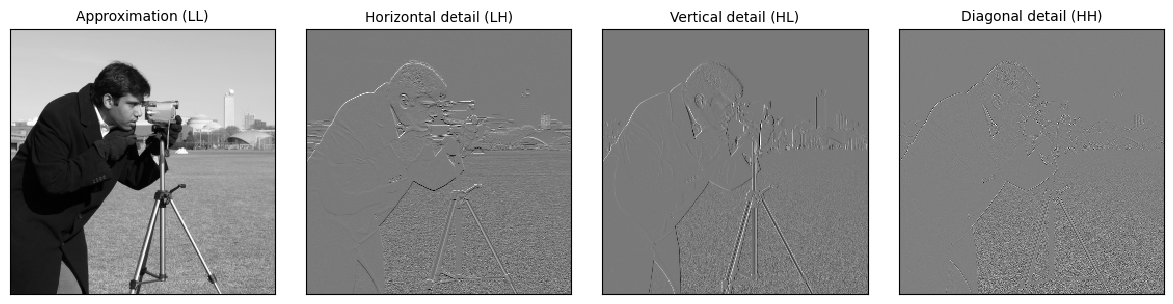

In [4]:
import matplotlib.pyplot as plt
import pywt.data


original = pywt.data.camera()


coeffs2 = pywt.dwt2(original, 'haar')
cA, (cH, cV, cD) = coeffs2


titles = ['Approximation (LL)', 'Horizontal detail (LH)',
          'Vertical detail (HL)', 'Diagonal detail (HH)']
images = [cA, cH, cV, cD]

fig = plt.figure(figsize=(12, 3))
for i, a in enumerate(images):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])

fig.tight_layout()
plt.show()

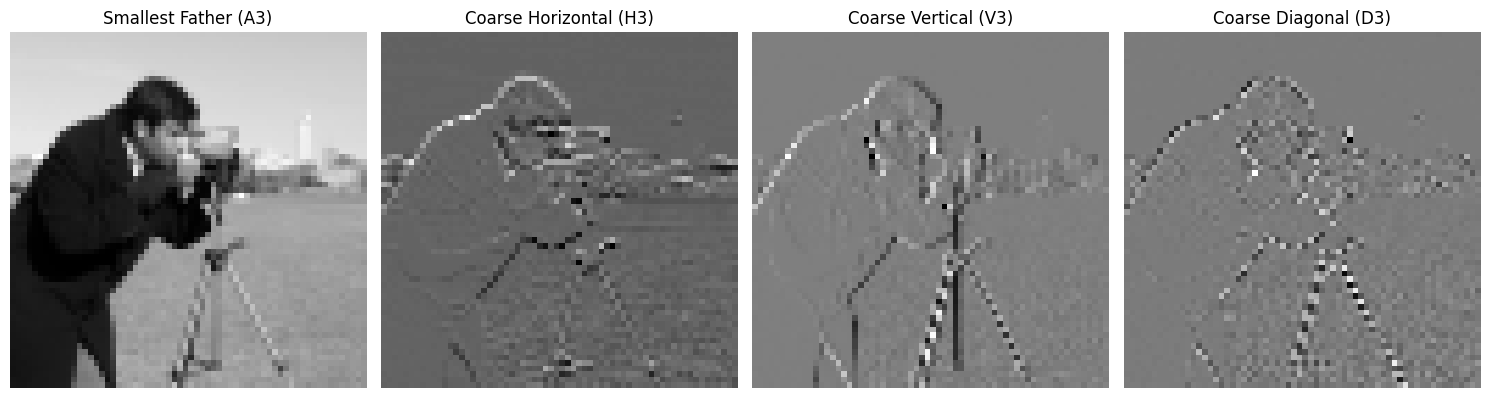

In [5]:
original = pywt.data.camera()

# 1. Multi-level Decomposition
# 'level=3' will decompose the LL quadrant 3 times.
level = 3
coeffs = pywt.wavedec2(original, 'haar', level=level)

# 2. Understanding the Structure
# coeffs[0] is the smallest Approximation (LL)
# coeffs[1] is a tuple (LH, HL, HH) for Level 3 (coarsest details)
# coeffs[2] is a tuple (LH, HL, HH) for Level 2
# coeffs[3] is a tuple (LH, HL, HH) for Level 1 (finest details)

cA3 = coeffs[0]
(cH3, cV3, cD3) = coeffs[1]

fig, axes = plt.subplots(1, 4, figsize=(15, 5))
axes[0].imshow(cA3, cmap='gray')
axes[0].set_title("Smallest Father (A3)")

axes[1].imshow(cH3, cmap='gray')
axes[1].set_title("Coarse Horizontal (H3)")

axes[2].imshow(cV3, cmap='gray')
axes[2].set_title("Coarse Vertical (V3)")

axes[3].imshow(cD3, cmap='gray')
axes[3].set_title("Coarse Diagonal (D3)")

for ax in axes:
    ax.axis('off')

plt.tight_layout()
plt.show()

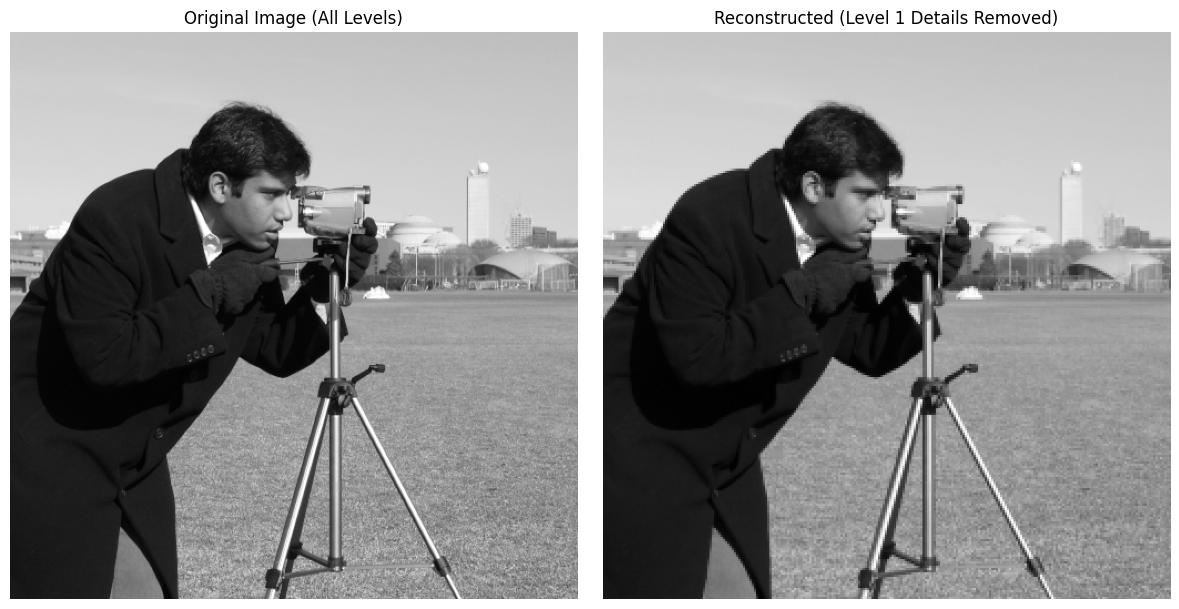

In [6]:
original = pywt.data.camera().astype(np.float32)
wavelet = 'haar'
level = 3
coeffs = pywt.wavedec2(original, wavelet, level=level)

coeffs_filtered = list(coeffs) 


cH1_zero = np.zeros_like(coeffs[-1][0])
cV1_zero = np.zeros_like(coeffs[-1][1])
cD1_zero = np.zeros_like(coeffs[-1][2])


coeffs_filtered[-1] = (cH1_zero, cV1_zero, cD1_zero)


reconstructed_img = pywt.waverec2(coeffs_filtered, wavelet)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].imshow(original, cmap='gray')
axes[0].set_title("Original Image (All Levels)")
axes[0].axis('off')

axes[1].imshow(reconstructed_img, cmap='gray')
axes[1].set_title("Reconstructed (Level 1 Details Removed)")
axes[1].axis('off')

plt.tight_layout()
plt.show() 

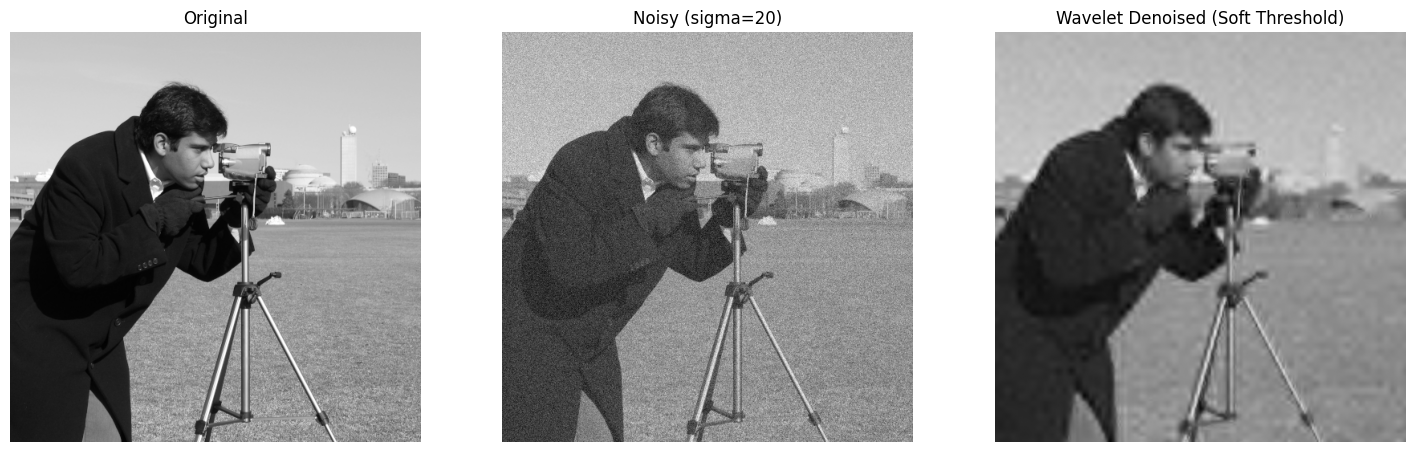

In [7]:

original = pywt.data.camera().astype(np.float32)

noise_sigma = 20
noisy_img = original + np.random.normal(0, noise_sigma, original.shape)

wavelet = 'db4'
level = 3
coeffs = pywt.wavedec2(noisy_img, wavelet, level=level)


d1_flattened = np.concatenate([c.flatten() for c in coeffs[-1]])
sigma = np.median(np.abs(d1_flattened)) / 0.6745
threshold = sigma * np.sqrt(2 * np.log(original.size))


new_coeffs = [coeffs[0]] 
for i in range(1, len(coeffs)):
    new_coeffs.append(tuple(pywt.threshold(c, threshold, mode='soft') for c in coeffs[i]))


denoised_img = pywt.waverec2(new_coeffs, wavelet)


fig, axes = plt.subplots(1, 3, figsize=(18, 6))
axes[0].imshow(original, cmap='gray')
axes[0].set_title("Original")
axes[1].imshow(noisy_img, cmap='gray')
axes[1].set_title(f"Noisy (sigma={noise_sigma})")
axes[2].imshow(denoised_img, cmap='gray')
axes[2].set_title("Wavelet Denoised (Soft Threshold)")

for ax in axes:
    ax.axis('off')
plt.show()

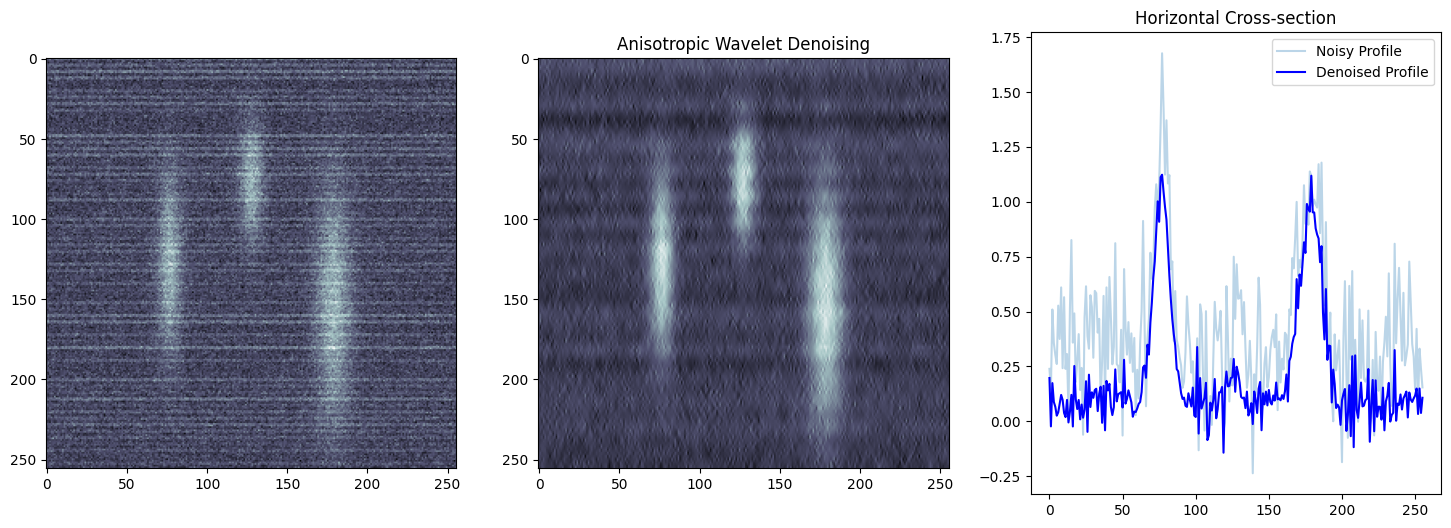

In [8]:
# Setting up an image with anisotropic noise, goal is to denoise the image while preserving the vertical features.
N = 256
t = np.linspace(0, 1, N)
X, Y = np.meshgrid(t, t)

def make_cell(x0, y0, sigma_x, sigma_y):
    return np.exp(-((X-x0)**2/(2*sigma_x**2) + (Y-y0)**2/(2*sigma_y**2)))

cells = make_cell(0.3, 0.5, 0.02, 0.15) + \
        make_cell(0.5, 0.3, 0.02, 0.1) + \
        make_cell(0.7, 0.6, 0.03, 0.2)


noise = np.random.normal(0, 0.2, (N, N))
for i in range(0, N, 4):
    noise[i:i+2, :] += 0.5 * np.random.rand()

noisy_cells = cells + noise


wavelet = 'sym8'
coeffs = pywt.wavedec2(noisy_cells, wavelet, level=3)

def directional_denoise(coeffs, h_lam, v_lam, d_lam):
    new_coeffs = [coeffs[0]] 
    for i in range(1, len(coeffs)):
        cH, cV, cD = coeffs[i]
      
        cH_t = pywt.threshold(cH, h_lam, mode='soft')

        cV_t = pywt.threshold(cV, v_lam, mode='soft')
    
        cD_t = pywt.threshold(cD, d_lam, mode='soft')
        new_coeffs.append((cH_t, cV_t, cD_t))
    return new_coeffs


processed_coeffs = directional_denoise(coeffs, h_lam=1.2, v_lam=0.1, d_lam=1.2)
denoised_cells = pywt.waverec2(processed_coeffs, wavelet)


fig, axes = plt.subplots(1, 3, figsize=(18, 6))
axes[0].imshow(noisy_cells, cmap='bone')

axes[1].imshow(denoised_cells, cmap='bone')
axes[1].set_title("Anisotropic Wavelet Denoising")


axes[2].plot(noisy_cells[N//2, :], alpha=0.3, label="Noisy Profile")
axes[2].plot(denoised_cells[N//2, :], color='blue', label="Denoised Profile")
axes[2].set_title("Horizontal Cross-section")
axes[2].legend()

plt.show()

Raw data contains "Fuzz" (high-frequency noise) and "Drift" (low-frequency trends) that hide the true signal.

1. Start with stacking multiple signals into a 2D image to process simultaneoulsy. 

2. Apply thresholding to the Horizontal and Diagonal details to delete noise.

3. We isolate the Approximation (LL) sub-band, which represents the slow drift, and subtract it from the signal.

4. The result is a centered, clean signal that preserves sharp edges better than standard 1D filters.

c:\Users\User\Desktop\WaveLets\.venv\Lib\site-packages\pywt\_multilevel.py:43: UserWarning: Level value of 6 is too high: all coefficients will experience boundary effects.
  warnings.warn(


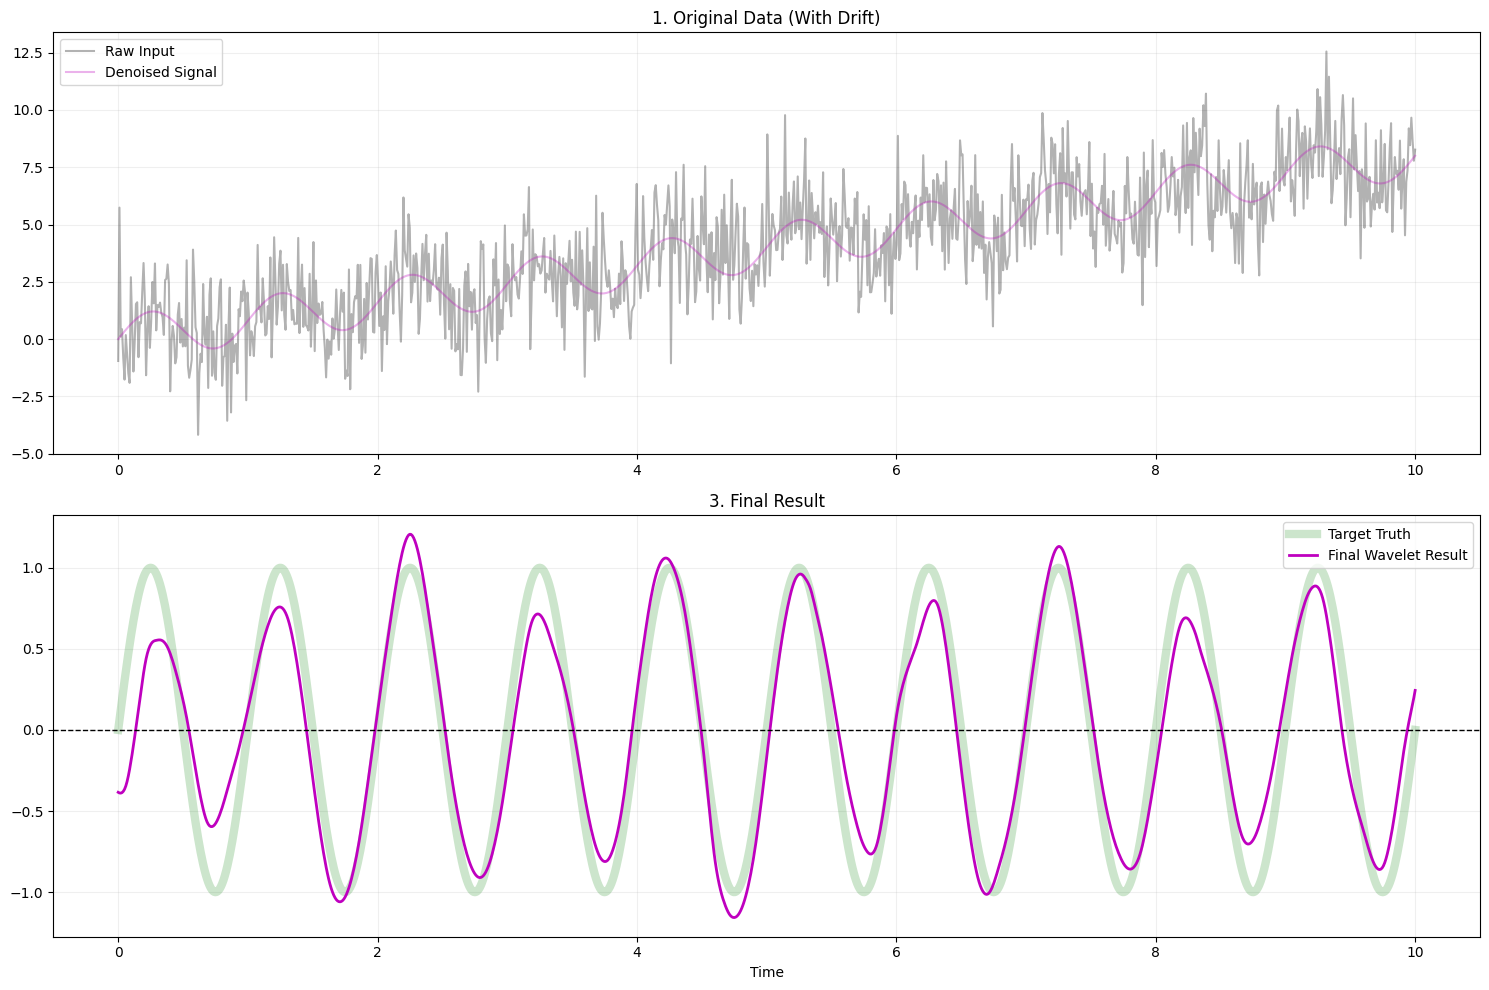

In [9]:
np.random.seed(0)

n_sensors, n_timepoints = 50, 1024
t = np.linspace(0, 10, n_timepoints)
base_signal = np.sin(2 * np.pi * 1.0 * t)
trend_matrix = (0.8 * t) + np.random.normal(0, 1.5, (n_sensors, n_timepoints))
signal_trend = np.tile(base_signal, (n_sensors, 1)) + (0.8 * t)
data_2d = np.tile(base_signal, (n_sensors, 1)) + trend_matrix + np.random.normal(0, 0.5, (n_sensors, n_timepoints))


wavelet = 'sym8'
level = 6 
coeffs = pywt.wavedec2(data_2d, wavelet, level=level, mode='reflect')


coeffs[0] = np.zeros_like(coeffs[0])


for i in range(1, len(coeffs)):
    cH, cV, cD = coeffs[i]
    thresh = (np.median(np.abs(cD)) / 0.6745) * np.sqrt(2 * np.log(cD.size))
    coeffs[i] = (
        pywt.threshold(cH, thresh, mode='soft'),
        pywt.threshold(cV, thresh, mode='soft'),
        pywt.threshold(cD, thresh, mode='soft')
    )


final_cleaned = pywt.waverec2(coeffs, wavelet, mode='reflect')


sensor_idx = 10
plt.figure(figsize=(15, 10))

plt.subplot(2, 1, 1)
plt.plot(t, data_2d[sensor_idx], 'k', alpha=0.3, label='Raw Input')
plt.plot(t, signal_trend[sensor_idx],'m', alpha = 0.3, label = 'Denoised Signal')
plt.title("1. Original Data (With Drift)"); plt.legend(); plt.grid(True, alpha=0.2)

plt.subplot(2, 1, 2)
plt.plot(t, base_signal, 'g', lw=6, alpha=0.2, label='Target Truth')
plt.plot(t, final_cleaned[sensor_idx], 'm', lw=2, label='Final Wavelet Result')
plt.axhline(0, color='black', lw=1, ls='--')
plt.title("3. Final Result"); plt.xlabel("Time"); plt.legend(); plt.grid(True, alpha=0.2)

plt.tight_layout()
plt.show()

c:\Users\User\Desktop\WaveLets\.venv\Lib\site-packages\pywt\_multilevel.py:43: UserWarning: Level value of 3 is too high: all coefficients will experience boundary effects.
  warnings.warn(


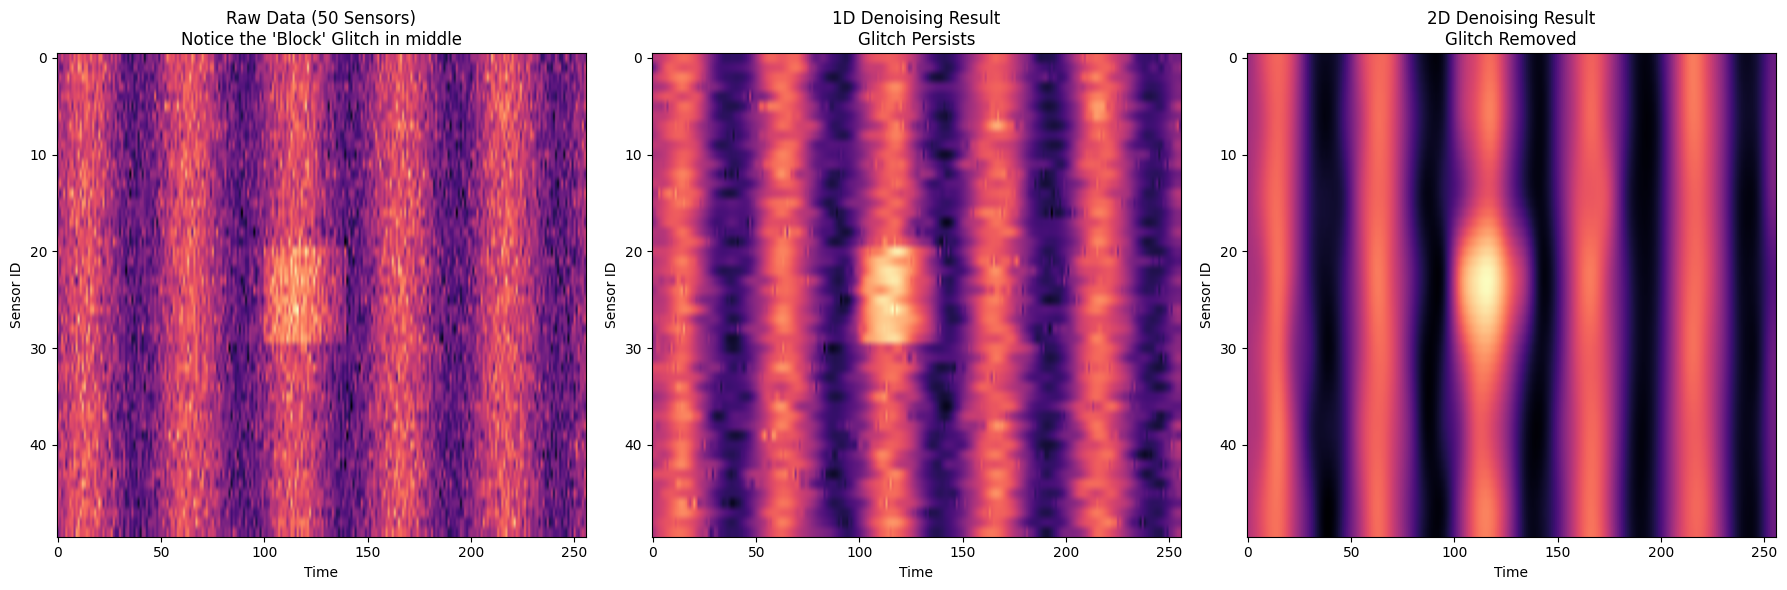

In [10]:

N_sensors = 50
N_time = 256
t = np.linspace(0, 1, N_time)
base_signal = np.sin(2 * np.pi * 5 * t)


data_2d = np.tile(base_signal, (N_sensors, 1))



data_2d[20:30, 100:140] += 1

data_2d += np.random.normal(0, 0.5, (N_sensors, N_time))


denoised_1d = np.zeros_like(data_2d)
for i in range(N_sensors):
    coeffs_1d = pywt.wavedec(data_2d[i], 'sym8', level=3, mode='reflect')
    coeffs_1d[1:] = [pywt.threshold(c, 1.0, mode='soft') for c in coeffs_1d[1:]]
    denoised_1d[i] = pywt.waverec(coeffs_1d, 'sym8')


coeffs_2d = pywt.wavedec2(data_2d, 'sym8', level=3, mode='reflect')

cA, (cH3, cV3, cD3), (cH2, cV2, cD2), (cH1, cV1, cD1) = coeffs_2d

def kill_glitch(H, V, D, amt=5.0):
    return (pywt.threshold(H, amt), pywt.threshold(V, amt), pywt.threshold(D, amt))

threshold = 5
c3_new = kill_glitch(cH3, cV3, cD3, amt=threshold)
c2_new = kill_glitch(cH2, cV2, cD2, amt=threshold)
c1_new = kill_glitch(cH1, cV1, cD1, amt=threshold)

denoised_2d = pywt.waverec2([cA, c3_new, c2_new, c1_new], 'sym8')


fig, axes = plt.subplots(1, 3, figsize=(18, 6))

axes[0].imshow(data_2d, aspect='auto', cmap='magma')
axes[0].set_title("Raw Data (50 Sensors)\nNotice the 'Block' Glitch in middle")

axes[1].imshow(denoised_1d, aspect='auto', cmap='magma')
axes[1].set_title("1D Denoising Result\nGlitch Persists")

axes[2].imshow(denoised_2d, aspect='auto', cmap='magma')
axes[2].set_title("2D Denoising Result\nGlitch Removed")

for ax in axes: ax.set_xlabel("Time"); ax.set_ylabel("Sensor ID")
plt.tight_layout()
plt.show()

threshold value 1.2497981336611281
threshold value 1.4945899246139416
threshold value 1.547032460662057


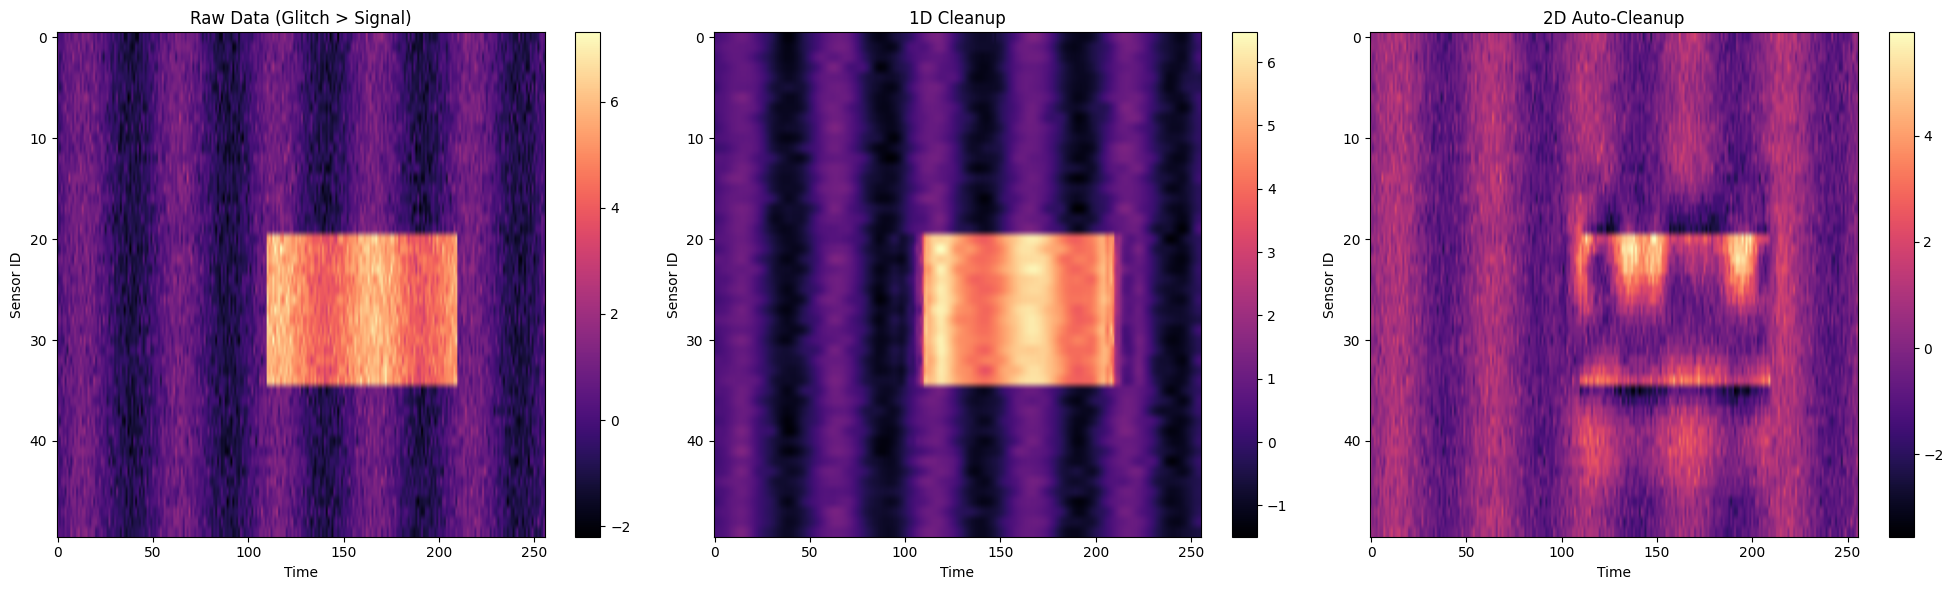

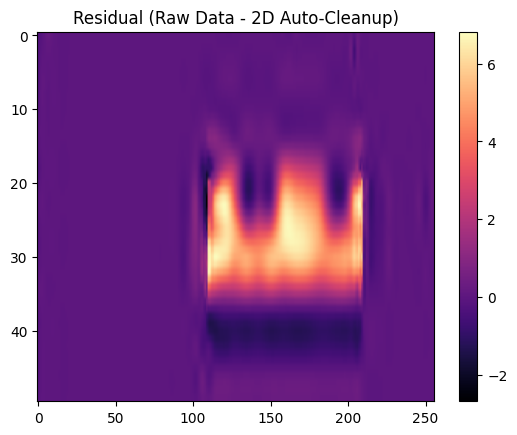

In [11]:
N_sensors, N_time = 50, 256
t = np.linspace(0, 1, N_time)

base_signal = np.sin(2 * np.pi * 5 * t)
data_2d = np.tile(base_signal, (N_sensors, 1))


data_2d[20:35, 110:210] += 5.0 

data_2d += np.random.normal(0, 0.4, (N_sensors, N_time))


def auto_clean_2d(data, wavelet='sym8', level=3, sigma_factor=4):
    coeffs = pywt.wavedec2(data, wavelet, level=level, mode='reflect')
    cA = coeffs[0]
    details = coeffs[1:]
    
    clean_details = []
    for i, (H, V, D) in enumerate(details):

        sigma = np.median(np.abs(D)) / 0.6745
        thresh = sigma * sigma_factor
        print(f"threshold value {thresh}")
        mask = (np.abs(V) > thresh) | (np.abs(D) > thresh)

        H[mask], V[mask], D[mask] = 0, 0, 0
        clean_details.append((H, V, D))
    
    sigma_a = np.median(np.abs(cA)) / 0.6745
    cA[np.abs(cA) > (sigma_a * sigma_factor)] = 0
    
    return pywt.waverec2([cA, *clean_details], wavelet)


denoised_1d = np.zeros_like(data_2d)
for i in range(N_sensors):
    c_1d = pywt.wavedec(data_2d[i], 'sym8', level=3, mode='reflect')
    c_1d[1:] = [pywt.threshold(c, 1.5, mode='soft') for c in c_1d[1:]]
    denoised_1d[i] = pywt.waverec(c_1d, 'sym8')


cleaned_2d = auto_clean_2d(data_2d)

fig, axes = plt.subplots(1, 3, figsize=(20, 6))
titles = ["Raw Data (Glitch > Signal)", "1D Cleanup", "2D Auto-Cleanup"]
imgs = [data_2d, denoised_1d, cleaned_2d]

for ax, img, title in zip(axes, imgs, titles):
    im = ax.imshow(img, aspect='auto', cmap='magma')
    ax.set_title(title)
    plt.colorbar(im, ax=ax)
for ax in axes: ax.set_xlabel("Time"); ax.set_ylabel("Sensor ID")
plt.tight_layout()
plt.show()

residual = data_2d - cleaned_2d

ims = plt.imshow(residual, aspect = 'auto',cmap = 'magma')
plt.title('Residual (Raw Data - 2D Auto-Cleanup)')
plt.colorbar(ims)


In [14]:

original = pywt.data.camera().astype(np.float32)

def quantize_coeffs(coeffs, delta):
    """
    Maps coefficients to integers using step size delta.
    Structure of coeffs: [cA, (cHn, cVn, cDn), ..., (cH1, cV1, cD1)]
    """
    quant_coeffs = []
    quant_coeffs.append(np.round(coeffs[0] / delta).astype(np.int32))
    
    for level in coeffs[1:]:
        q_level = tuple(np.round(c / delta).astype(np.int32) for c in level)
        quant_coeffs.append(q_level)
    return quant_coeffs

def dequantize_coeffs(q_coeffs, delta):
    """Maps integers back to floats for reconstruction."""
    dq_coeffs = []
    dq_coeffs.append(q_coeffs[0].astype(np.float32) * delta)
    for level in q_coeffs[1:]:
        dq_level = tuple(c.astype(np.float32) * delta for c in level)
        dq_coeffs.append(dq_level)
    return dq_coeffs



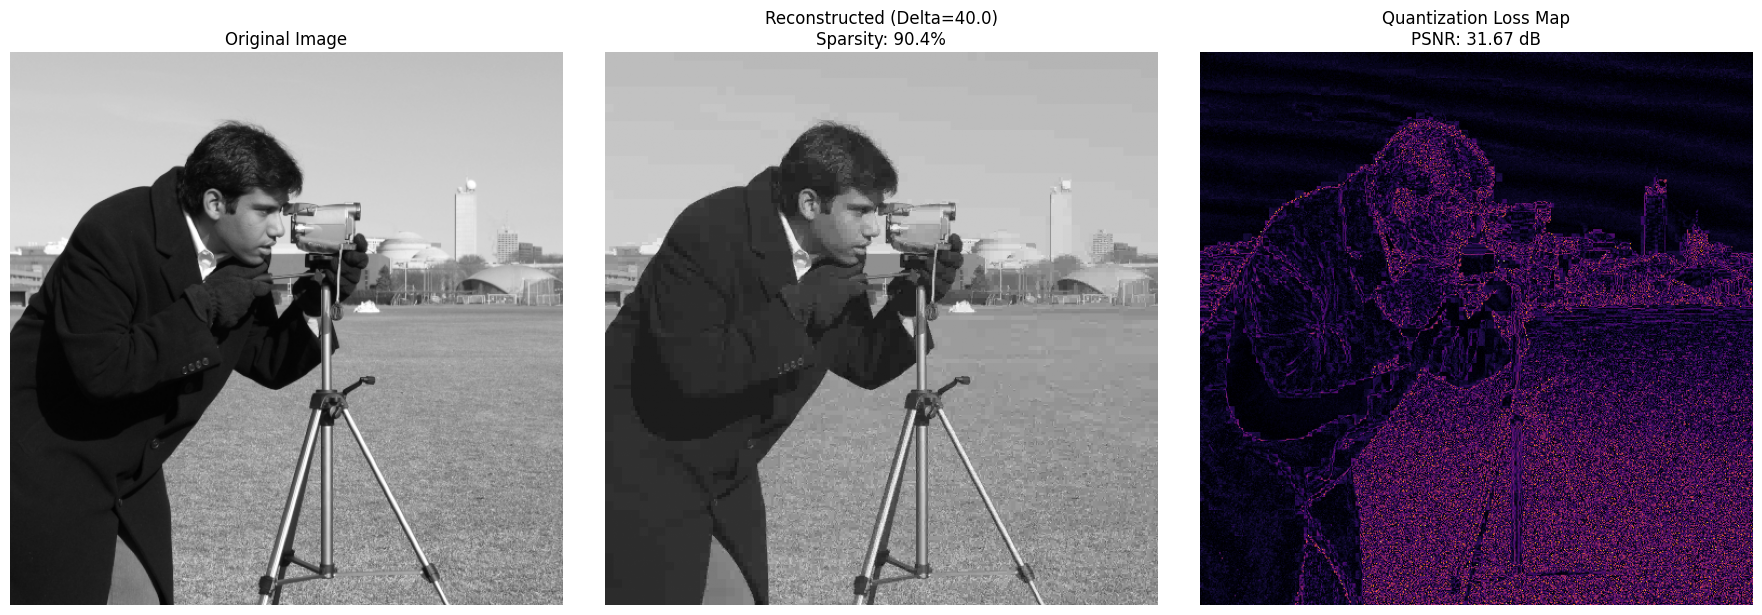

MSE: 44.26
Sparsity: 90.37% of coefficients are now 0.


In [ ]:
WAVELET = 'haar'
LEVELS = 3
DELTA = 40.0 


coeffs = pywt.wavedec2(original, WAVELET, level=LEVELS)

q_coeffs = quantize_coeffs(coeffs, DELTA)

dq_coeffs = dequantize_coeffs(q_coeffs, DELTA)

reconstructed = pywt.waverec2(dq_coeffs, WAVELET)

total_elements = original.size
zero_elements = np.sum(q_coeffs[0] == 0)
for level in q_coeffs[1:]:
    for c in level:
        zero_elements += np.sum(c == 0)
sparsity = (zero_elements / total_elements) * 100

mse = np.mean((original - reconstructed) ** 2)
psnr = 10 * np.log10((255**2) / mse) # (Peak Signal-to-Noise Ratio

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

axes[0].imshow(original, cmap='gray')
axes[0].set_title("Original Image")
axes[0].axis('off')

axes[1].imshow(reconstructed, cmap='gray')
axes[1].set_title(f"Reconstructed (Delta={DELTA})\nSparsity: {sparsity:.1f}%")
axes[1].axis('off')

# Loss Map: Where did the data go?
loss_map = np.abs(original - reconstructed)
axes[2].imshow(loss_map, cmap='inferno')
axes[2].set_title(f"Quantization Loss Map\nPSNR: {psnr:.2f} dB")
axes[2].axis('off')

plt.tight_layout()
plt.show()

print(f"MSE: {mse:.2f}")
print(f"Sparsity: {sparsity:.2f}% of coefficients are now 0.")

In [19]:
import io
import zlib
import pickle

# 1. Calculate Original Size in KB (Raw float32)
# Every pixel is 4 bytes (32 bits)
original_size_kb = original.nbytes / 1024

reconstructed_size_kb = reconstructed.nbytes / 1024
# 2. Simulate Compression of Quantized Coefficients
coefficient_bytes = pickle.dumps(q_coeffs)
compressed_bytes = zlib.compress(coefficient_bytes)
compressed_size_kb = len(compressed_bytes) / 1024

# 3. Calculate Metrics
space_saved_kb = original_size_kb - compressed_size_kb
percentage_saved = (space_saved_kb / original_size_kb) * 100
compression_ratio = original_size_kb / compressed_size_kb

print(f"--- COMPRESSION STATS (Delta={DELTA}) ---")
print(f"Original Size:       {original_size_kb:>10.2f} KB")
print(f"Reconstructed Size:       {reconstructed_size_kb:>10.2f} KB")
print(f"Compressed Size:     {compressed_size_kb:>10.2f} KB")
print(f"Space Saved:         {space_saved_kb:>10.2f} KB")
print(f"Savings Percentage:  {percentage_saved:>10.1f}%")
print(f"Compression Ratio:   {compression_ratio:>10.2f}:1")

--- COMPRESSION STATS (Delta=40.0) ---
Original Size:          1024.00 KB
Reconstructed Size:          1024.00 KB
Compressed Size:          32.12 KB
Space Saved:             991.88 KB
Savings Percentage:        96.9%
Compression Ratio:        31.88:1
